In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#load data
file_path = "Customer_Info.csv"  
df = pd.read_csv(file_path, sep=',')
#show 5 first rows
df.head()


,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes
1,0003-MKNFE,Male,46,No,No,No,No,0,No
2,0004-TLHLJ,Male,50,No,No,No,No,0,No
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes


In [4]:
#check dataset size and info
print(df.shape)
df.info()

(7043, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           7043 non-null   object
 1   gender                7043 non-null   object
 2   age                   7043 non-null   int64 
 3   under_30              7043 non-null   object
 4   senior_citizen        7043 non-null   object
 5   partner               7043 non-null   object
 6   dependents            7043 non-null   object
 7   number_of_dependents  7043 non-null   int64 
 8   married               7043 non-null   object
dtypes: int64(2), object(7)
memory usage: 495.3+ KB


In [5]:
#check basic stats
df.describe()

,age,number_of_dependents
count,7043.000000,7043.000000
mean,46.509726,0.468692
std,16.750352,0.962802
min,19.000000,0.000000
25%,32.000000,0.000000
50%,46.000000,0.000000
75%,60.000000,0.000000
max,80.000000,9.000000


In [6]:
# Show columns with missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


Series([], dtype: int64)

In [23]:
# %%
# Copy dữ liệu gốc để thao tác
d = df.copy()

# Sort theo customer_id để dễ đọc
d.sort_values(by='customer_id', inplace=True)

# Reset lại index
d.reset_index(drop=True, inplace=True)

# Show 5 dòng đầu
d.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes
1,0003-MKNFE,Male,46,No,No,No,No,0,No
2,0004-TLHLJ,Male,50,No,No,No,No,0,No
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes


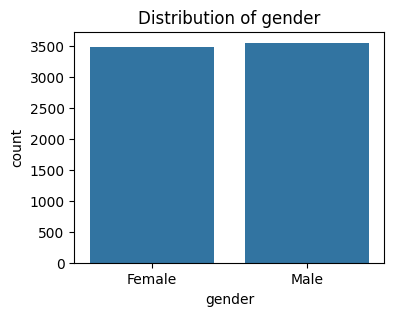

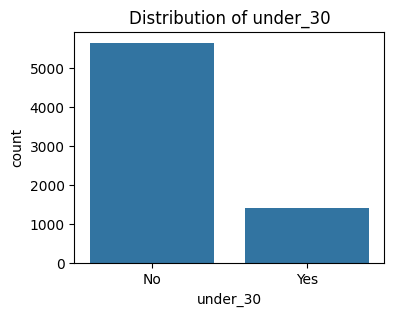

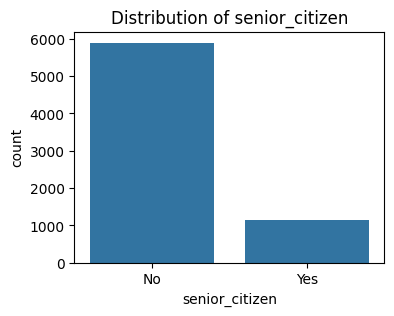

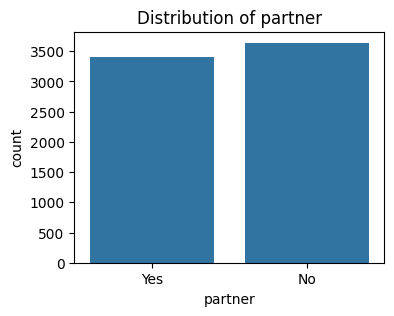

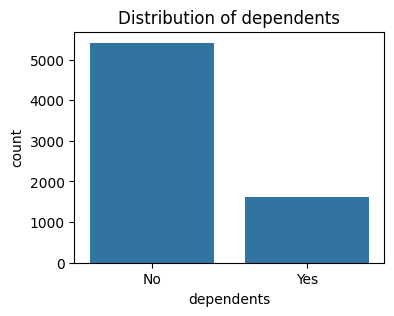

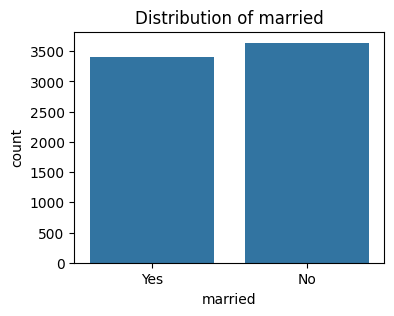

In [26]:
# 6. Categorical distributions
cat_cols = ["gender", "under_30", "senior_citizen", "partner", "dependents", "married"]

for col in cat_cols:
    plt.figure(figsize=(4,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()


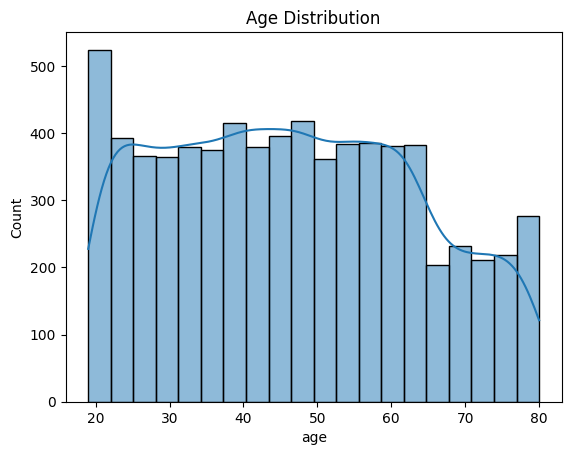

In [8]:
#Numeric distribution: Age
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

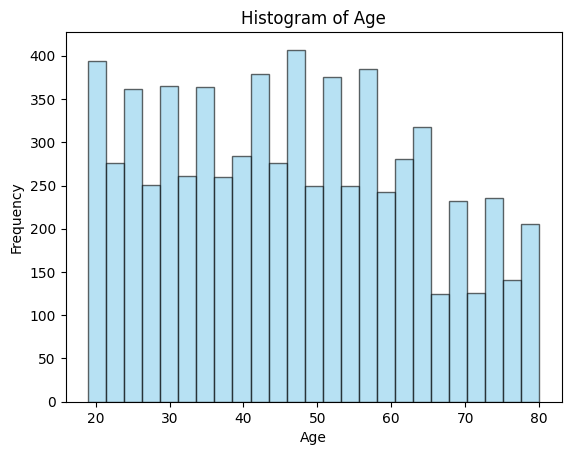

In [11]:
ax = df['age'].plot.hist(bins=25, alpha=0.6, color="skyblue", edgecolor="black")
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Age')
plt.show()

In [28]:
float_cols = d.select_dtypes(include=['float64','int64']).columns
skew_limit = 0.75  # Ngưỡng để xem biến có bị skew không
skew_vals = d[float_cols].skew()

# Lọc những cột có skewness > 0.75
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

number_of_dependents    2.109932
dtype: float64

In [12]:
#Average number of dependents by Married status
df.groupby("married")["number_of_dependents"].mean()

married
No     0.166987
Yes    0.791593
Name: number_of_dependents, dtype: float64

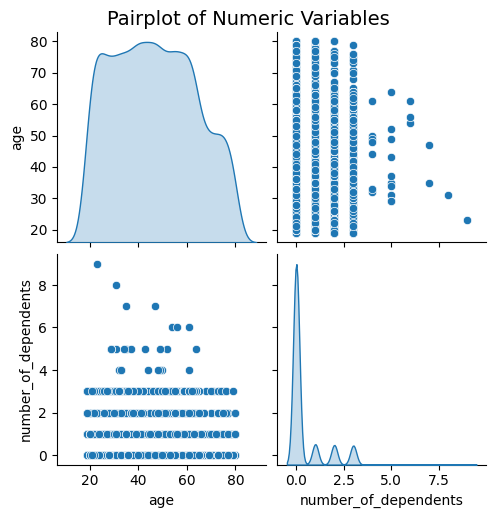

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các biến numeric
num_cols = ['age', 'number_of_dependents']  

# Vẽ scatterplots nhiều biến với target giả định (ví dụ age & dependents vs nhau)
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Variables", y=1.02, fontsize=14)
plt.show()


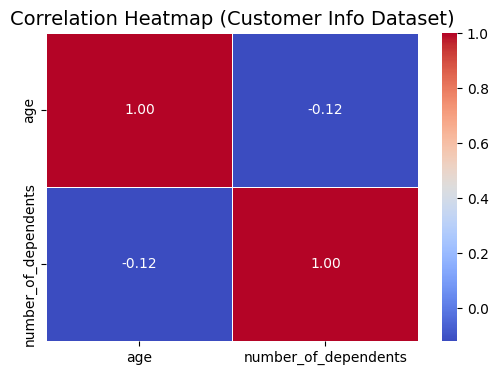

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan (chỉ cho numerical columns)
corr = df.corr(numeric_only=True)

# Vẽ heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Customer Info Dataset)", fontsize=14)
plt.show()


In [43]:
import plotly.express as px

# Đếm phân phối số người phụ thuộc
dependents_count = df['number_of_dependents'].value_counts().reset_index()
dependents_count.columns = ['number_of_dependents', 'count']  # đổi tên cột

fig = px.bar(dependents_count,
             x="number_of_dependents", 
             y="count",
             title="Distribution of Number of Dependents",
             labels={"number_of_dependents": "Number of Dependents", "count": "Count"})
fig.show()



In [13]:
#Hypotheses
hypotheses = [
    "H1: Married customers are older on average than non-married customers.",
    "H2: Customers with partners are more likely to have dependents.",
    "H3: Younger customers (under 30) have fewer dependents."
]
hypotheses

['H1: Married customers are older on average than non-married customers.',
 'H2: Customers with partners are more likely to have dependents.',
 'H3: Younger customers (under 30) have fewer dependents.']

In [14]:
#Test H1: Age difference between Married vs Not Married
married = df[df["married"]=="Yes"]["age"]
not_married = df[df["married"]=="No"]["age"]

tstat, pval = stats.ttest_ind(married, not_married, equal_var=False)
print("t-statistic:", tstat, "p-value:", pval)


t-statistic: -0.3073069175332108 p-value: 0.7586189422910672


In [15]:
#Test H2: Partner vs Dependents
ct = pd.crosstab(df["partner"], df["dependents"])
chi2, p, dof, expected = stats.chi2_contingency(ct)
print("Chi2:", chi2, "p-value:", p)


Chi2: 928.5251185481318 p-value: 6.17887079222224e-204


In [16]:
#Test H3: Under 30 vs Number of dependents (t-test)
under30 = df[df["under_30"]=="Yes"]["number_of_dependents"]
over30 = df[df["under_30"]=="No"]["number_of_dependents"]

tstat, pval = stats.ttest_ind(under30, over30, equal_var=False)
print("t-statistic:", tstat, "p-value:", pval)


t-statistic: 2.940950164345457 p-value: 0.0033085890673008457
